# Eddy Chl Schematics

Ocean science figs: 1,2,B2

LJK

Date created: 12/23/24

Last edited: 12/23/24

Schematics originally from 'satellite_eddy_chl_analysis_v10.ipynb'; seperated the scripts

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image, display

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import os,sys,csv

from config import *
sys.path.append('../RCLVatlas/')
sys.path.append('../RCLVatlas/RCLVatlas/')
from subfunctions_for_RCLV_atlas import read_RCLV_CSV_untracked,read_RCLV_CSV_tracked,save_RCLV_CSV
from mainfunctions_for_RCLV_atlas import *

In [2]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [3]:
# Retrieve initialization dates from LAVD directory
dates = []
LAVD_dir = project_output_dir + 'parcels_8day_overlap_32day_LAVD/' 

for filename in os.listdir(LAVD_dir):
    dates.append(filename[0:8])
date_list = np.sort(np.unique(dates)).tolist()[::-1] #Reverse the order because we will iterate from the latest date to the earliest

start_year,end_year = 2000,2019
date_list = [i for i in date_list if ((int(i[0:4]) >= start_year) and (int(i[0:4]) <= end_year))]

In [4]:
RCLV_data = []
with open(project_output_dir + 'parcels_8day_overlap_32day_RCLVatlas/RCLV_20000101_20191227_atlas_includes_genesis.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        if i == 0:
            print(row)
        else:
            RCLV_data.append(row)
        i += 1
RCLV_data = np.array(RCLV_data,dtype=object)

['Date', 'RCLV ID', 'Orientation', 'Age (days)', 'Area (km^2)', 'Center Lon', 'Center Lat', 'CD', 'flag', 'Boundary Coords']


In [5]:
def read_SSH_eddy_data(filename,test_date):
    """
    Reads in csv file
    """
    eddy_dir = project_output_dir + 'SLA_eddies/'
    eddy_data = []
    with open(eddy_dir + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        i = 0
        for row in csv_reader:
            if i == 0:
                print(row) #this is just to check the header; there will be 'empty' columns because the boundary coords will take up many columns
#            elif (row[0] == str(test_date)):
            else:
                eddy_data.append(row)
            i += 1
    return np.array(eddy_data)

In [6]:
anti_filename = 'anticyc_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v2.csv'
cyc_filename = 'cyclonic_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v2.csv'

anti_eddy_data = read_SSH_eddy_data(anti_filename,'20100101')
cyc_eddy_data = read_SSH_eddy_data(cyc_filename,'20100101')

['Date', 'Eddy ID', 'Age (days)', 'Area (km^2)', 'Ls (km)', 'Center Lon', 'Center Lat', 'Amplitude (cm)', 'Translation Speed (m/s)', 'Boundary Coords', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['Date', 'Eddy ID', 'Age (days)', 'Area (km^2)', 'Ls (km)', 'Center 

## Atlas Stats

1. RCLV Data

In [7]:
print(len(RCLV_data)) # num of RCLV instances
print(len(np.unique([row[1] for row in RCLV_data[1:]]))) # num of unique RCLVs

75445
11855


In [8]:
unique_anti_RCLVs,unique_cyc_RCLVs = [],[]
for row in RCLV_data[1:]:
    ID = row[1]
    orientation = row[2]
    
    if orientation == 'cyc':
        unique_cyc_RCLVs.append(ID)
    elif orientation == 'anti':
        unique_anti_RCLVs.append(ID)

unique_anti_RCLVs = np.unique(unique_anti_RCLVs)
unique_cyc_RCLVs = np.unique(unique_cyc_RCLVs)

print(len(unique_anti_RCLVs))
print(len(unique_cyc_RCLVs))
print(len(unique_anti_RCLVs) + len(unique_cyc_RCLVs))

5592
6263
11855


2. SLA Data

In [9]:
print(len(anti_eddy_data))
print(len(cyc_eddy_data))
print(len(anti_eddy_data) + len(cyc_eddy_data))

25165
27388
52553


In [10]:
num_unique_anti_eddies = len(np.unique([row[1] for row in anti_eddy_data]))
num_unique_cyc_eddies = len(np.unique([row[1] for row in cyc_eddy_data]))

print(num_unique_anti_eddies)
print(num_unique_cyc_eddies)
print(num_unique_anti_eddies + num_unique_cyc_eddies)

3322
3524
6846


In [11]:
np.min([float(row[3]) for row in anti_eddy_data])

8048.355328

In [12]:
np.min([float(row[3]) for row in cyc_eddy_data])

8050.106304

## Interpolation Schematic

In [13]:
traj_dir = project_output_dir + 'parcels_8day_overlap_32day_trajs/'
traj_lon_array = np.arange(180,230,0.03125)
traj_lat_array = np.arange(15,30,0.03125)

In [14]:
sample_data = RCLV_data[np.where([row[1]=='118' for row in RCLV_data])]

In [15]:
RCLV_bnds = [r[9:] for r in sample_data]
RCLV_dates = [r[0] for r in sample_data]
RCLV_ages = [r[3] for r in sample_data]

In [16]:
month_dict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

In [17]:
def draw_eddy_boundaries_back_timesteps(date_list,current_date,traj,poly_lons,poly_lats,n):
    """
    Input
        current_date: intialization date to draw boundaries back from 
        traj: trajectory dataset
        poly_lons,poly_lats: coordinates of the polygon
        n: number of times to go back a timestep (i.e., to draw boundaries back ~8 days 4 times, n = 4)
            NOTE: there is a limit on doing this; can't do more than length of the simulation
    Output
        successful_dates: dates that a boundary was successfully drawn
        traj_back_timesteps_boundaries: boundary coordinates
        eddy_center_lons,eddy_center_lats: eddy center coordinates 
        areas_km2: area in kilometers of the feature
    """
    # Project the contour on the grid to find all particles inside the eddy
    poly_pts = [(poly_lons[pt],poly_lats[pt]) for pt in np.arange(0,len(poly_lons))] # Reformat lat/lon boundary points
    x_mask,y_mask = find_polygon_pts(poly_pts,traj_lon_array,traj_lat_array)

    # Get the dates of the timesteps
    traj_back_timesteps_dates = []
    current_date_ind = date_list.index(current_date)    
    for step in np.arange(0,n+1):
        traj_back_timesteps_dates.append(date_list[current_date_ind+step])

    # Get the coordinates of the particles
    particle_lon,particle_lat = traj.variables["lon"],traj.variables["lat"] # particle lat/lons from the trajectory file
    
    particle_lons,particle_lats,successful_dates = [],[],[]
    for t in traj_back_timesteps_dates: #iterate through each timestep
        days_btwn = num_days_between(t,current_date)
        time_ind = int(24/sim_params['output_freq'])*days_btwn
        
        # All particles in the contour locations at timestep t
        eddy_timestepx_lons,eddy_timestepx_lats,_ = extract_particles_after_time(traj,x_mask,y_mask,traj_lat_array,sim_params,days_btwn)
        particle_lons.append(eddy_timestepx_lons)
        particle_lats.append(eddy_timestepx_lats)
        successful_dates.append(t)

    return successful_dates,particle_lons,particle_lats

In [18]:
def draw_eddy_trajectories_back_timesteps(traj,poly_lons,poly_lats):
    """
    Input
        current_date: intialization date to draw boundaries back from 
        traj: trajectory dataset
        poly_lons,poly_lats: coordinates of the polygon
        n: number of times to go back a timestep (i.e., to draw boundaries back ~8 days 4 times, n = 4)
            NOTE: there is a limit on doing this; can't do more than length of the simulation
    Output
        successful_dates: dates that a boundary was successfully drawn
        traj_back_timesteps_boundaries: boundary coordinates
        eddy_center_lons,eddy_center_lats: eddy center coordinates 
        areas_km2: area in kilometers of the feature
    """
    # Project the contour on the grid to find all particles inside the eddy
    poly_pts = [(poly_lons[pt],poly_lats[pt]) for pt in np.arange(0,len(poly_lons))] # Reformat lat/lon boundary points
    x_mask,y_mask = find_polygon_pts(poly_pts,traj_lon_array,traj_lat_array)

    # Get the coordinates of the particles
    particle_lon,particle_lat = traj.variables["lon"],traj.variables["lat"] # particle lat/lons from the trajectory file
    
    particle_lons,particle_lats,dates = [],[],[]
    for t in np.arange(0,25): #iterate through each timestep
        # All particles in the contour locations at timestep t
        eddy_timestepx_lons,eddy_timestepx_lats,_ = extract_particles_after_time(traj,x_mask,y_mask,traj_lat_array,sim_params,t)
        particle_lons.append(eddy_timestepx_lons)
        particle_lats.append(eddy_timestepx_lats)
        dates.append(t)

    return dates,particle_lons,particle_lats

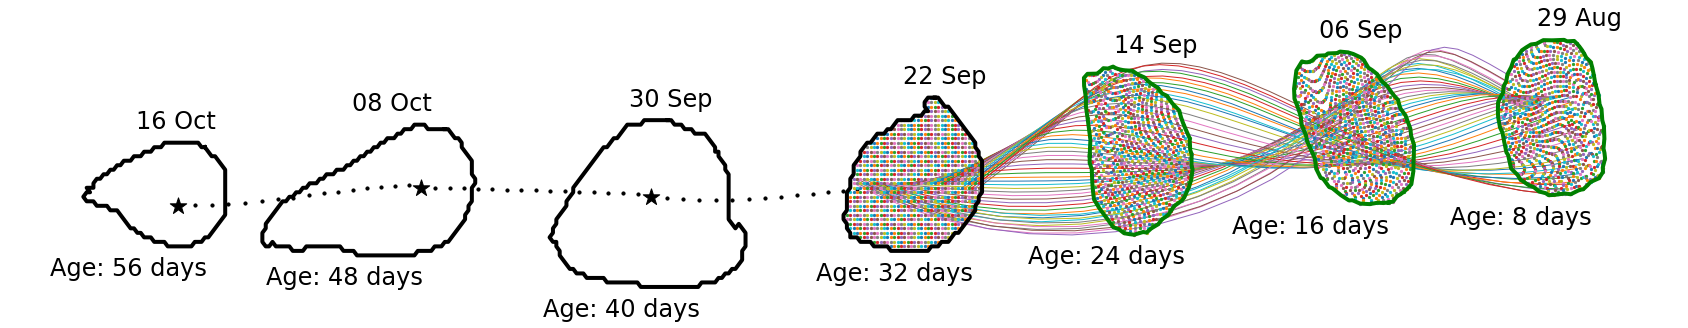

In [19]:
fontsize = 24
space_multiplier = 1.5

fig,ax = plt.subplots(1,1,figsize=(30,5))

for i in np.arange(0,len(RCLV_bnds)): 
    
    current_date = RCLV_dates[i]
    
    # Plot the contour boundaries
    x_bnds = [float(coord)+(i*space_multiplier) for coord in RCLV_bnds[i][0::2]] #give false x coords to spread out the contours
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
    
    if int(current_date) >= 20190922:
        color = 'k'
    else:
        color = 'g'
        
    if (int(current_date) < 20191024):
        ax.plot(x_bnds,y_bnds,linewidth=4,c=color,zorder=10)

        # Label date & age
        
        
        ax.text(np.median(x_bnds)-0.2,np.max(y_bnds)+0.1,'%s %s'%(current_date[6:8],month_dict[current_date[4:6]]),fontsize=fontsize)
        ax.text(np.median(x_bnds)-1,np.min(y_bnds)-0.2,'Age: %s days'%(RCLV_ages[i]),fontsize=fontsize)
    
        # Open the trajectory file for the current date
        traj_file = '%s_32days_runtime_20min_timestep_particle_start_lat_15.0_30.0_lon_180.0_230.0_spatial_step_0.03125_6hr_output_freq.nc'%(current_date)
        traj = xr.open_dataset(traj_dir + traj_file)
        particle_lon = traj.variables["lon"]
        particle_lat = traj.variables["lat"]

    if (int(current_date) > 20190922) and (int(current_date) < 20191024): # eddy goes on for more days but cropping for purposes of the paper
        center_lon,center_lat = float(sample_data[i][5]),float(sample_data[i][6])
        x_ind = int(np.where(traj_lon_array==center_lon)[0])
        y_ind = int(np.where(traj_lat_array==center_lat)[0])
        particle_num = x_ind*len(traj_lat_array) + y_ind 

        for d in np.arange(0,16):
            backxdays_center_lon = float(particle_lon[particle_num,d*2])
            backxdays_center_lat = float(particle_lat[particle_num,d*2])
            
            if d == 0:
                marker = '*'
                size = 300
            else:
                marker = 'o'
                size = 10
            ax.scatter(backxdays_center_lon+((i+(d/16))*space_multiplier),backxdays_center_lat,c='k',s=size,zorder=-i,marker=marker)

    elif int(current_date) == 20190922:
        x_bnds_actual = [float(coord) for coord in RCLV_bnds[i][0::2]] #give false x coords to spread out the contours
        y_bnds_actual = [float(coord) for coord in RCLV_bnds[i][1::2]]
        
        successful_dates,particle_lons,particle_lats = draw_eddy_boundaries_back_timesteps(date_list,current_date,traj,x_bnds_actual,y_bnds_actual,3) # Particle locations
        
        # Particle trajectories
        traj_dates,traj_lons,traj_lats = draw_eddy_trajectories_back_timesteps(traj,x_bnds_actual,y_bnds_actual)
        
        # Transform the coordinates for the schematic
        transformed_traj_lons = []
        for j in np.arange(0,len(traj_lons)): #j is the index for the date
            transformed_traj_lons.append([particle_lon+((i+(j/8))*space_multiplier) for particle_lon in traj_lons[j]])
        
        for p in np.arange(0,len(particle_lons)):
            for l in np.arange(0,len(particle_lons[p])):
                ax.scatter(particle_lons[p][l]+((i+p)*space_multiplier),particle_lats[p][l],s=5,zorder=1)
                
            #ax.scatter(particle_lons[p]+((i+p)*space_multiplier),particle_lats[p],s=5,color='gray',zorder=1)
            
        ax.plot(np.array(transformed_traj_lons)[:,450:500],np.array(traj_lats)[:,450:500],linewidth=1, zorder=0)
            
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
ax.axis('off')

#plt.show()

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'eddy_genesis.png', format='png', dpi=350)

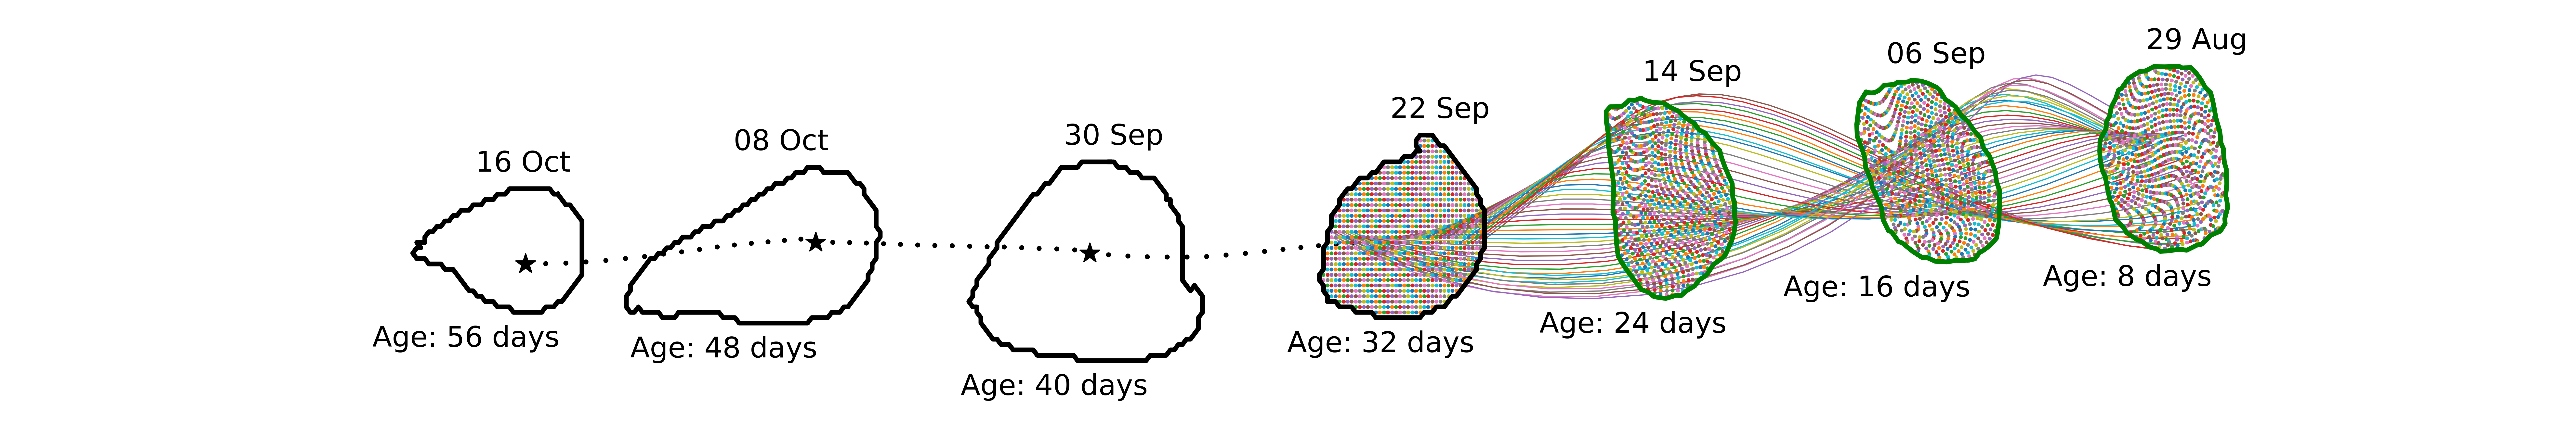

In [20]:
display(Image(filename=save_dir + 'eddy_genesis.png'))

## Particle Trajectory Schematic

In [21]:
# Color palette
bg_color = '#808080'

SSH_anti_color = '#FFA09A' #lightest
coh_anti_color = '#e84a4a'
SSH_coh_anti_color = '#991414' # darkest
anti_colors = [SSH_anti_color,coh_anti_color,SSH_coh_anti_color]

SSH_cyc_color = '#B2B2FE'  #lightest
coh_cyc_color = '#6e6ef7'
SSH_coh_cyc_color = '#08088A' # darkest
cyc_colors = [SSH_cyc_color,coh_cyc_color,SSH_coh_cyc_color]

In [22]:
d = 2

plot_date = RCLV_dates[d]
lat1,lat2 = 15,30
lon1,lon2 = 180,230

LAVD_file = '%s_LAVD_32days_runtime_20min_timestep_particle_start_lat_15.0_30.0_lon_180.0_230.0_spatial_step_0.03125_6hr_output_freq.npy'%(plot_date)
LAVD = np.load(LAVD_dir+LAVD_file)

LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #required for the peak_local_max function to work
LAVD_lat_array = np.arange(lat1,lat2,0.03125)
LAVD_lon_array = np.arange(lon1,lon2,0.03125)
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(LAVD_lon_array),len(LAVD_lat_array))))

In [23]:
eddy_dir = project_output_dir + 'SLA_eddies/'
anti_filename = 'anticyc_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v2.csv'
cyc_filename = 'cyclonic_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v2.csv'

cyc_df = pd.read_csv(eddy_dir + cyc_filename)
cyc_df_subset = cyc_df[cyc_df['Date'].eq(float(plot_date)) & cyc_df['Age (days)'].ge(32)] # subset by plot date and age

anti_df = pd.read_csv(eddy_dir + anti_filename)
anti_df_subset = anti_df[anti_df['Date'].eq(float(plot_date)) & anti_df['Age (days)'].ge(32)]
anti_df_subset

Date  Eddy ID  Age (days)   Area (km^2)     Ls (km)  Center Lon  \
24602  20191024   148194         146  13213.300480   64.853097  216.177562   
24679  20191024   148356         137  28275.050496   94.869532  199.192346   
24702  20191024   148359         137  65785.252864  144.706933  219.241198   
24742  20191024   148683         120  22519.361856   84.664842  214.589608   
24835  20191024   149459          78  65158.135936  144.015551  227.666968   
24864  20191024   149659          66  24440.016960   88.201468  189.104348   
24881  20191024   149877          54  99295.152832  177.782532  217.883128   
24896  20191024   149910          52  43734.643264  117.988005  215.479419   
24906  20191024   149983          48  13718.695360   66.081740  223.501066   
24912  20191024   149984          48  29698.474304   97.228175  225.842545   
24926  20191024   150098          41  40144.767808  113.041924  193.948476   
24936  20191024   150101          41  21026.633408   81.810667  208.953115   
24942  20191024   150156          38  30092.094336   97.870379  190.567609   
24959  20191024   150183          37  15560.182656   70.377269  187.886730   
24964  20191024   150201          36  94347.329152  173.296531  192.739181   
24977  20191024   150218          35  79917.552128  159.494661  182.547315   
24986  20191024   150240          34  52682.799680  129.496934  203.810651   
24999  20191024   150275          32  13719.701888   66.084164  180.948408   

       Center Lat  Amplitude (cm)  Translation Speed (m/s)  Boundary Coords  \
24602   18.059415        1.425385                 1.204284          215.375   
24679   23.710287        5.935789                 2.076764          198.375   
24702   25.020378        7.815313                37.551296          217.625   
24742   24.281618        2.384211                 2.390524          213.625   
24835   24.644154        7.703226                27.663336          226.125   
24864   28.321143        5.974118                11.976935          188.375   
24881   21.154299       10.623171                 4.713613          215.875   
24896   27.706842        9.076923                 7.172647          214.125   
24906   27.226492        1.371429                 0.903934          222.375   
24912   20.127437        4.958421                 1.969223          225.125   
24926   26.161579       11.576957                12.142421          192.875   
24936   24.703896        5.047222                55.742845          208.125   
24942   17.817631        2.719524                 6.295655          189.875   
24959   23.641919        4.620714                 1.820498          187.125   
24964   22.284114       26.448108                14.729820          191.625   
24977   16.554709        5.335789                 2.390277          180.375   
24986   22.724429       12.691923                12.175643          202.875   
24999   20.651285        1.956667                 1.424601          180.375   

       ...  Unnamed: 195  Unnamed: 196  Unnamed: 197  Unnamed: 198  \
24602  ...           NaN           NaN           NaN           NaN   
24679  ...           NaN           NaN           NaN           NaN   
24702  ...           NaN           NaN           NaN           NaN   
24742  ...           NaN           NaN           NaN           NaN   
24835  ...           NaN           NaN           NaN           NaN   
24864  ...           NaN           NaN           NaN           NaN   
24881  ...           NaN           NaN           NaN           NaN   
24896  ...           NaN           NaN           NaN           NaN   
24906  ...           NaN           NaN           NaN           NaN   
24912  ...           NaN           NaN           NaN           NaN   
24926  ...           NaN           NaN           NaN           NaN   
24936  ...           NaN           NaN           NaN           NaN   
24942  ...           NaN           NaN           NaN           NaN   
24959  ...           NaN           NaN        

In [24]:
RCLV_subset = RCLV_data[np.where([row[0]==plot_date for row in RCLV_data])]
RCLV_anti_subset = RCLV_subset[np.where([((row[2]=='anti') & (float(row[3])>=32)) for row in RCLV_subset])]
RCLV_cyc_subset = RCLV_subset[np.where([((row[2]=='cyc') & (float(row[3])>=32)) for row in RCLV_subset])]

print(len(RCLV_anti_subset))
print(len(RCLV_cyc_subset))

20
23


In [25]:
traj = xr.open_dataset(project_output_dir + 'parcels_8day_overlap_32day_trajs/%s_32days_runtime_20min_timestep_particle_start_lat_15.0_30.0_lon_180.0_230.0_spatial_step_0.03125_6hr_output_freq.nc'%(plot_date))
particle_lon = traj.variables["lon"]
particle_lat = traj.variables["lat"]
particle_time = traj.variables["time"]

x,y = np.meshgrid(LAVD_lon_array,LAVD_lat_array)
x, y = x.flatten(), y.flatten()
grid_points = np.vstack((x,y)).T 

In [26]:
def get_particle_nums(x_bnds,y_bnds):
    poly_pts = []
    for bnd in np.arange(0,len(x_bnds)):
        poly_pts.append((x_bnds[bnd],y_bnds[bnd]))
    poly = Path(poly_pts) # make a polygon
    grid = poly.contains_points(grid_points)
    mask = grid.reshape(len(LAVD_lat_array),len(LAVD_lon_array)) # now you have a mask with points inside a polygon
    x_mask = np.where(mask == True)[1]
    y_mask = np.where(mask == True)[0]

    particle_nums = x_mask*len(LAVD_lat_array) + y_mask           
    return particle_nums

In [27]:
def get_coords_from_particle_nums(particle_nums,days):
    day_lons = [float(particle_lon[p,(4*days)]) for p in particle_nums]
    day_lats = [float(particle_lat[p,(4*days)]) for p in particle_nums]
    return day_lons,day_lats

In [28]:
CMEMS_dir = project_output_dir + 'CMEMS_data/'
CMEMS_file = 'dt_global_allsat_phy_l4_%s.nc'%(plot_date)
CMEMS_data = xr.open_dataset(CMEMS_dir + CMEMS_file)

CMEMS_lat1 = find_nearest(CMEMS_data.latitude,lat1)
CMEMS_lat2 = find_nearest(CMEMS_data.latitude,lat2+0.25)
CMEMS_lon1 = find_nearest(CMEMS_data.longitude,lon1)
CMEMS_lon2 = find_nearest(CMEMS_data.longitude,lon2+0.25)

CMEMS_lon_array = CMEMS_data.longitude[CMEMS_lon1:CMEMS_lon2]
CMEMS_lat_array = CMEMS_data.latitude[CMEMS_lat1:CMEMS_lat2]

NOTE: This takes a long time to run 

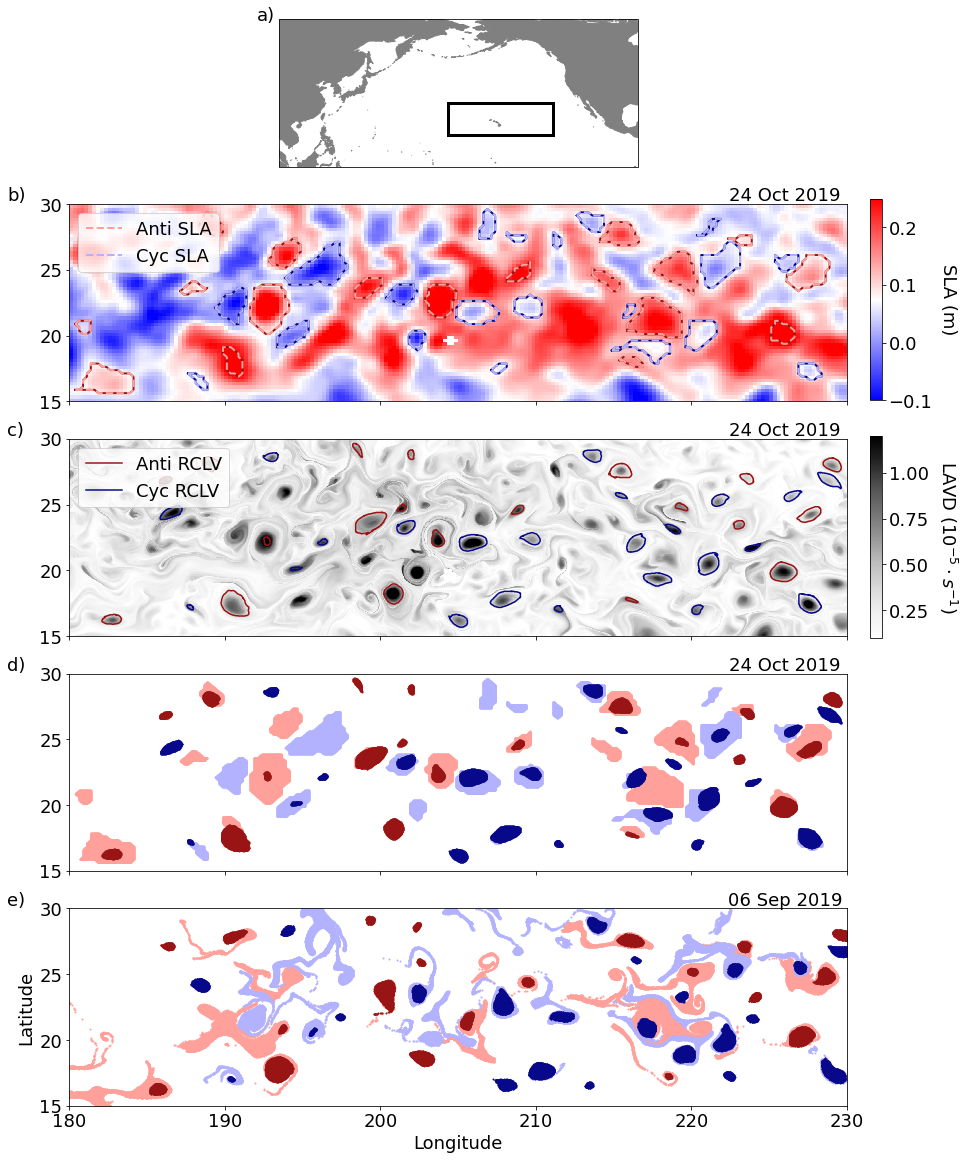

In [29]:
fontsize = 18
fig = plt.figure(figsize=(16,20))

ax = fig.add_gridspec(5,1,wspace=0.2,height_ratios=[0.75,1,1,1,1])

linewidth = 2

######## MAAAAP ########
proj = ccrs.PlateCarree(central_longitude=180) # set the projection
ax_map = fig.add_subplot(ax[0],projection=proj)
ax_map.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey'),zorder=0)

lon_min,lon_max = 180-180,230-180
lat_min,lat_max =  15,30
ax_map.plot([lon_min,lon_min],[lat_min,lat_max],c='k',linewidth=3,zorder=1)
ax_map.plot([lon_max,lon_max],[lat_min,lat_max],c='k',linewidth=3,zorder=1)
ax_map.plot([lon_min,lon_max],[lat_min,lat_min],c='k',linewidth=3,zorder=1)
ax_map.plot([lon_min,lon_max],[lat_max,lat_max],c='k',linewidth=3,zorder=1)

ax_map.set_xlim([lon_min-80, lon_max+40])
ax_map.set_ylim([lat_min-15, lat_max+40])

######## SLA #######
ax_sla = fig.add_subplot(ax[1,:])
sla_plot = ax_sla.pcolormesh(CMEMS_lon_array,CMEMS_lat_array,CMEMS_data.sla[0,CMEMS_lat1:CMEMS_lat2,CMEMS_lon1:CMEMS_lon2],cmap='bwr',shading='nearest',vmin=-0.1,vmax=0.25)

# Anti
anti_SLA_particles = []
c = 0
for index, row in anti_df_subset.iterrows():
    lon_bounds = [c for c in row[np.where(anti_df_subset.columns == 'Boundary Coords')[0][0]::2].values if not(np.isnan(c))]
    lat_bounds = [c for c in row[(np.where(anti_df_subset.columns == 'Boundary Coords')[0][0]+1)::2].values if not(np.isnan(c))]
    ax_sla.plot(lon_bounds,lat_bounds,c=SSH_coh_anti_color,linewidth=linewidth,linestyle='-')

    if c == 0: #add label
        ax_sla.plot(lon_bounds,lat_bounds,c=SSH_anti_color,linewidth=linewidth,linestyle='--',label='Anti SLA')
    else: # no label
        ax_sla.plot(lon_bounds,lat_bounds,c=SSH_anti_color,linewidth=linewidth,linestyle='--')
    
    anti_SLA_particles.extend(get_particle_nums(lon_bounds,lat_bounds))
    c += 1
    
# Cyc
cyc_SLA_particles = []
c = 0
for index, row in cyc_df_subset.iterrows():
    lon_bounds = [c for c in row[np.where(cyc_df_subset.columns == 'Boundary Coords')[0][0]::2].values if not(np.isnan(c))]
    lat_bounds = [c for c in row[(np.where(cyc_df_subset.columns == 'Boundary Coords')[0][0]+1)::2].values if not(np.isnan(c))]
    ax_sla.plot(lon_bounds,lat_bounds,c=SSH_coh_cyc_color,linewidth=linewidth,linestyle='-')

    if c == 0: # add label
        ax_sla.plot(lon_bounds,lat_bounds,c=SSH_cyc_color,linewidth=linewidth,linestyle='--',label='Cyc SLA')
    else: # no label
        ax_sla.plot(lon_bounds,lat_bounds,c=SSH_cyc_color,linewidth=linewidth,linestyle='--')
    cyc_SLA_particles.extend(get_particle_nums(lon_bounds,lat_bounds))
    c += 1
    
ax_sla.legend(loc='upper left')


######## LAVD #######
ax_lavd = fig.add_subplot(ax[2,:])
lavd_plot = ax_lavd.pcolormesh(LAVD_lon_array,LAVD_lat_array,LAVD_reshape/(10**-5),shading='nearest',cmap='Greys',
                               vmin=0.1, vmax=1.2);
ax_lavd.set_yticks([15,20,25,30])


# Anti RCLV
anti_RCLV_particles = []
c = 0 
for r in RCLV_anti_subset:
    x_bnds = [float(coord) for coord in r[9:][0::2]] 
    y_bnds = [float(coord) for coord in r[9:][1::2]]
    
    if c == 0: # add label
        ax_lavd.plot(x_bnds,y_bnds,c=SSH_coh_anti_color,label='Anti RCLV')
    else:
        ax_lavd.plot(x_bnds,y_bnds,c=SSH_coh_anti_color)
        
    anti_RCLV_particles.extend(get_particle_nums(x_bnds,y_bnds))
    c += 1
    
    
# Cyc RCLV
cyc_RCLV_particles = []
c = 0
for r in RCLV_cyc_subset:
    x_bnds = [float(coord) for coord in r[9:][0::2]] 
    y_bnds = [float(coord) for coord in r[9:][1::2]]
    
    if c == 0:
        ax_lavd.plot(x_bnds,y_bnds,c=SSH_coh_cyc_color,label='Cyc RCLV')
    else:
        ax_lavd.plot(x_bnds,y_bnds,c=SSH_coh_cyc_color)
    cyc_RCLV_particles.extend(get_particle_nums(x_bnds,y_bnds))     
    c += 1
    
ax_lavd.legend(loc='upper left')


######## Particles Day 0 ########

ax_day0 = fig.add_subplot(ax[3])

# Plot SLA particles lighter
day0_lons_anti_SLA,day0_lats_anti_SLA = get_coords_from_particle_nums(anti_SLA_particles,0)
ax_day0.scatter(day0_lons_anti_SLA,day0_lats_anti_SLA,s=1,c=SSH_anti_color,label='Anti SLA excluding RCLVs')

day0_lons_cyc_SLA,day0_lats_cyc_SLA = get_coords_from_particle_nums(cyc_SLA_particles,0)
ax_day0.scatter(day0_lons_cyc_SLA,day0_lats_cyc_SLA,s=1,c=SSH_cyc_color,label='Cyc SLA excluding RCLVs')

# Plot RCLV particles darker
day0_lons_anti_RCLV,day0_lats_anti_RCLV = get_coords_from_particle_nums(anti_RCLV_particles,0)
ax_day0.scatter(day0_lons_anti_RCLV,day0_lats_anti_RCLV,s=1,c=SSH_coh_anti_color,label='Anti RCLV')

day0_lons_cyc_RCLV,day0_lats_cyc_RCLV = get_coords_from_particle_nums(cyc_RCLV_particles,0)
ax_day0.scatter(day0_lons_cyc_RCLV,day0_lats_cyc_RCLV,s=1,c=SSH_coh_cyc_color,label='Cyc RCLV')

#ax_day0.legend(loc='upper left')


######## Particles Day -32 ########
ax_day32 = fig.add_subplot(ax[4])

day32_lons_anti_SLA,day32_lats_anti_SLA = get_coords_from_particle_nums(anti_SLA_particles,32)
ax_day32.scatter(day32_lons_anti_SLA,day32_lats_anti_SLA,s=1,c=SSH_anti_color)

day32_lons_cyc_SLA,day32_lats_cyc_SLA = get_coords_from_particle_nums(cyc_SLA_particles,32)
ax_day32.scatter(day32_lons_cyc_SLA,day32_lats_cyc_SLA,s=1,c=SSH_cyc_color)

day32_lons_anti_RCLV,day32_lats_anti_RCLV = get_coords_from_particle_nums(anti_RCLV_particles,32)
ax_day32.scatter(day32_lons_anti_RCLV,day32_lats_anti_RCLV,s=1,c=SSH_coh_anti_color)

day32_lons_cyc_RCLV,day32_lats_cyc_RCLV = get_coords_from_particle_nums(cyc_RCLV_particles,32)
ax_day32.scatter(day32_lons_cyc_RCLV,day32_lats_cyc_RCLV,s=1,c=SSH_coh_cyc_color)


######## Colorbars ########

fig.subplots_adjust(right=0.8)

cbar1_ax = fig.add_axes([0.82, 0.615, 0.01, 0.14]) #[left, bottom, width, height]
fig.colorbar(sla_plot, cax=cbar1_ax)
cbar1_ax.get_yaxis().labelpad = 25
cbar1_ax.set_ylabel('SLA (m)', rotation=270)

cbar2_ax = fig.add_axes([0.82, 0.45, 0.01, 0.14]) #[left, bottom, width, height]
fig.colorbar(lavd_plot, cax=cbar2_ax)
cbar2_ax.get_yaxis().labelpad = 30
cbar2_ax.set_ylabel('LAVD ($10^{-5}\cdot s^{-1}$)', rotation=270)


######## Labels & params ######## 
for a in [ax_sla,ax_lavd,ax_day0]:
    a.text(226,30.25,'%s %s %s'%(plot_date[6:8],month_dict[plot_date[4:6]],plot_date[0:4]),horizontalalignment='center')
    
plot_date_32 = RCLV_dates[d-4]
ax_day32.text(226,30.25,'%s %s %s'%(plot_date_32[6:8],month_dict[plot_date_32[4:6]],plot_date_32[0:4]),horizontalalignment='center')
    
ax_map.text(lon_min-90,lat_max+39,'a)')

labelx,labely=176,30.25
ax_sla.text(labelx,labely,'b)')
ax_lavd.text(labelx,labely,'c)')
ax_day0.text(labelx,labely,'d)')
ax_day32.text(labelx,labely,'e)')


for a in [ax_sla,ax_lavd,ax_day0,ax_day32]:    
    a.set_xlim([180,230])
    a.set_ylim([lat_min,lat_max])

for a in [ax_sla,ax_lavd,ax_day0]:
    a.set_xticklabels([])

ax_day32.set_xlabel('Longitude')
ax_day32.set_ylabel('Latitude')

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'SLA_LAVD_particles_OS.png', format='png', dpi=300)

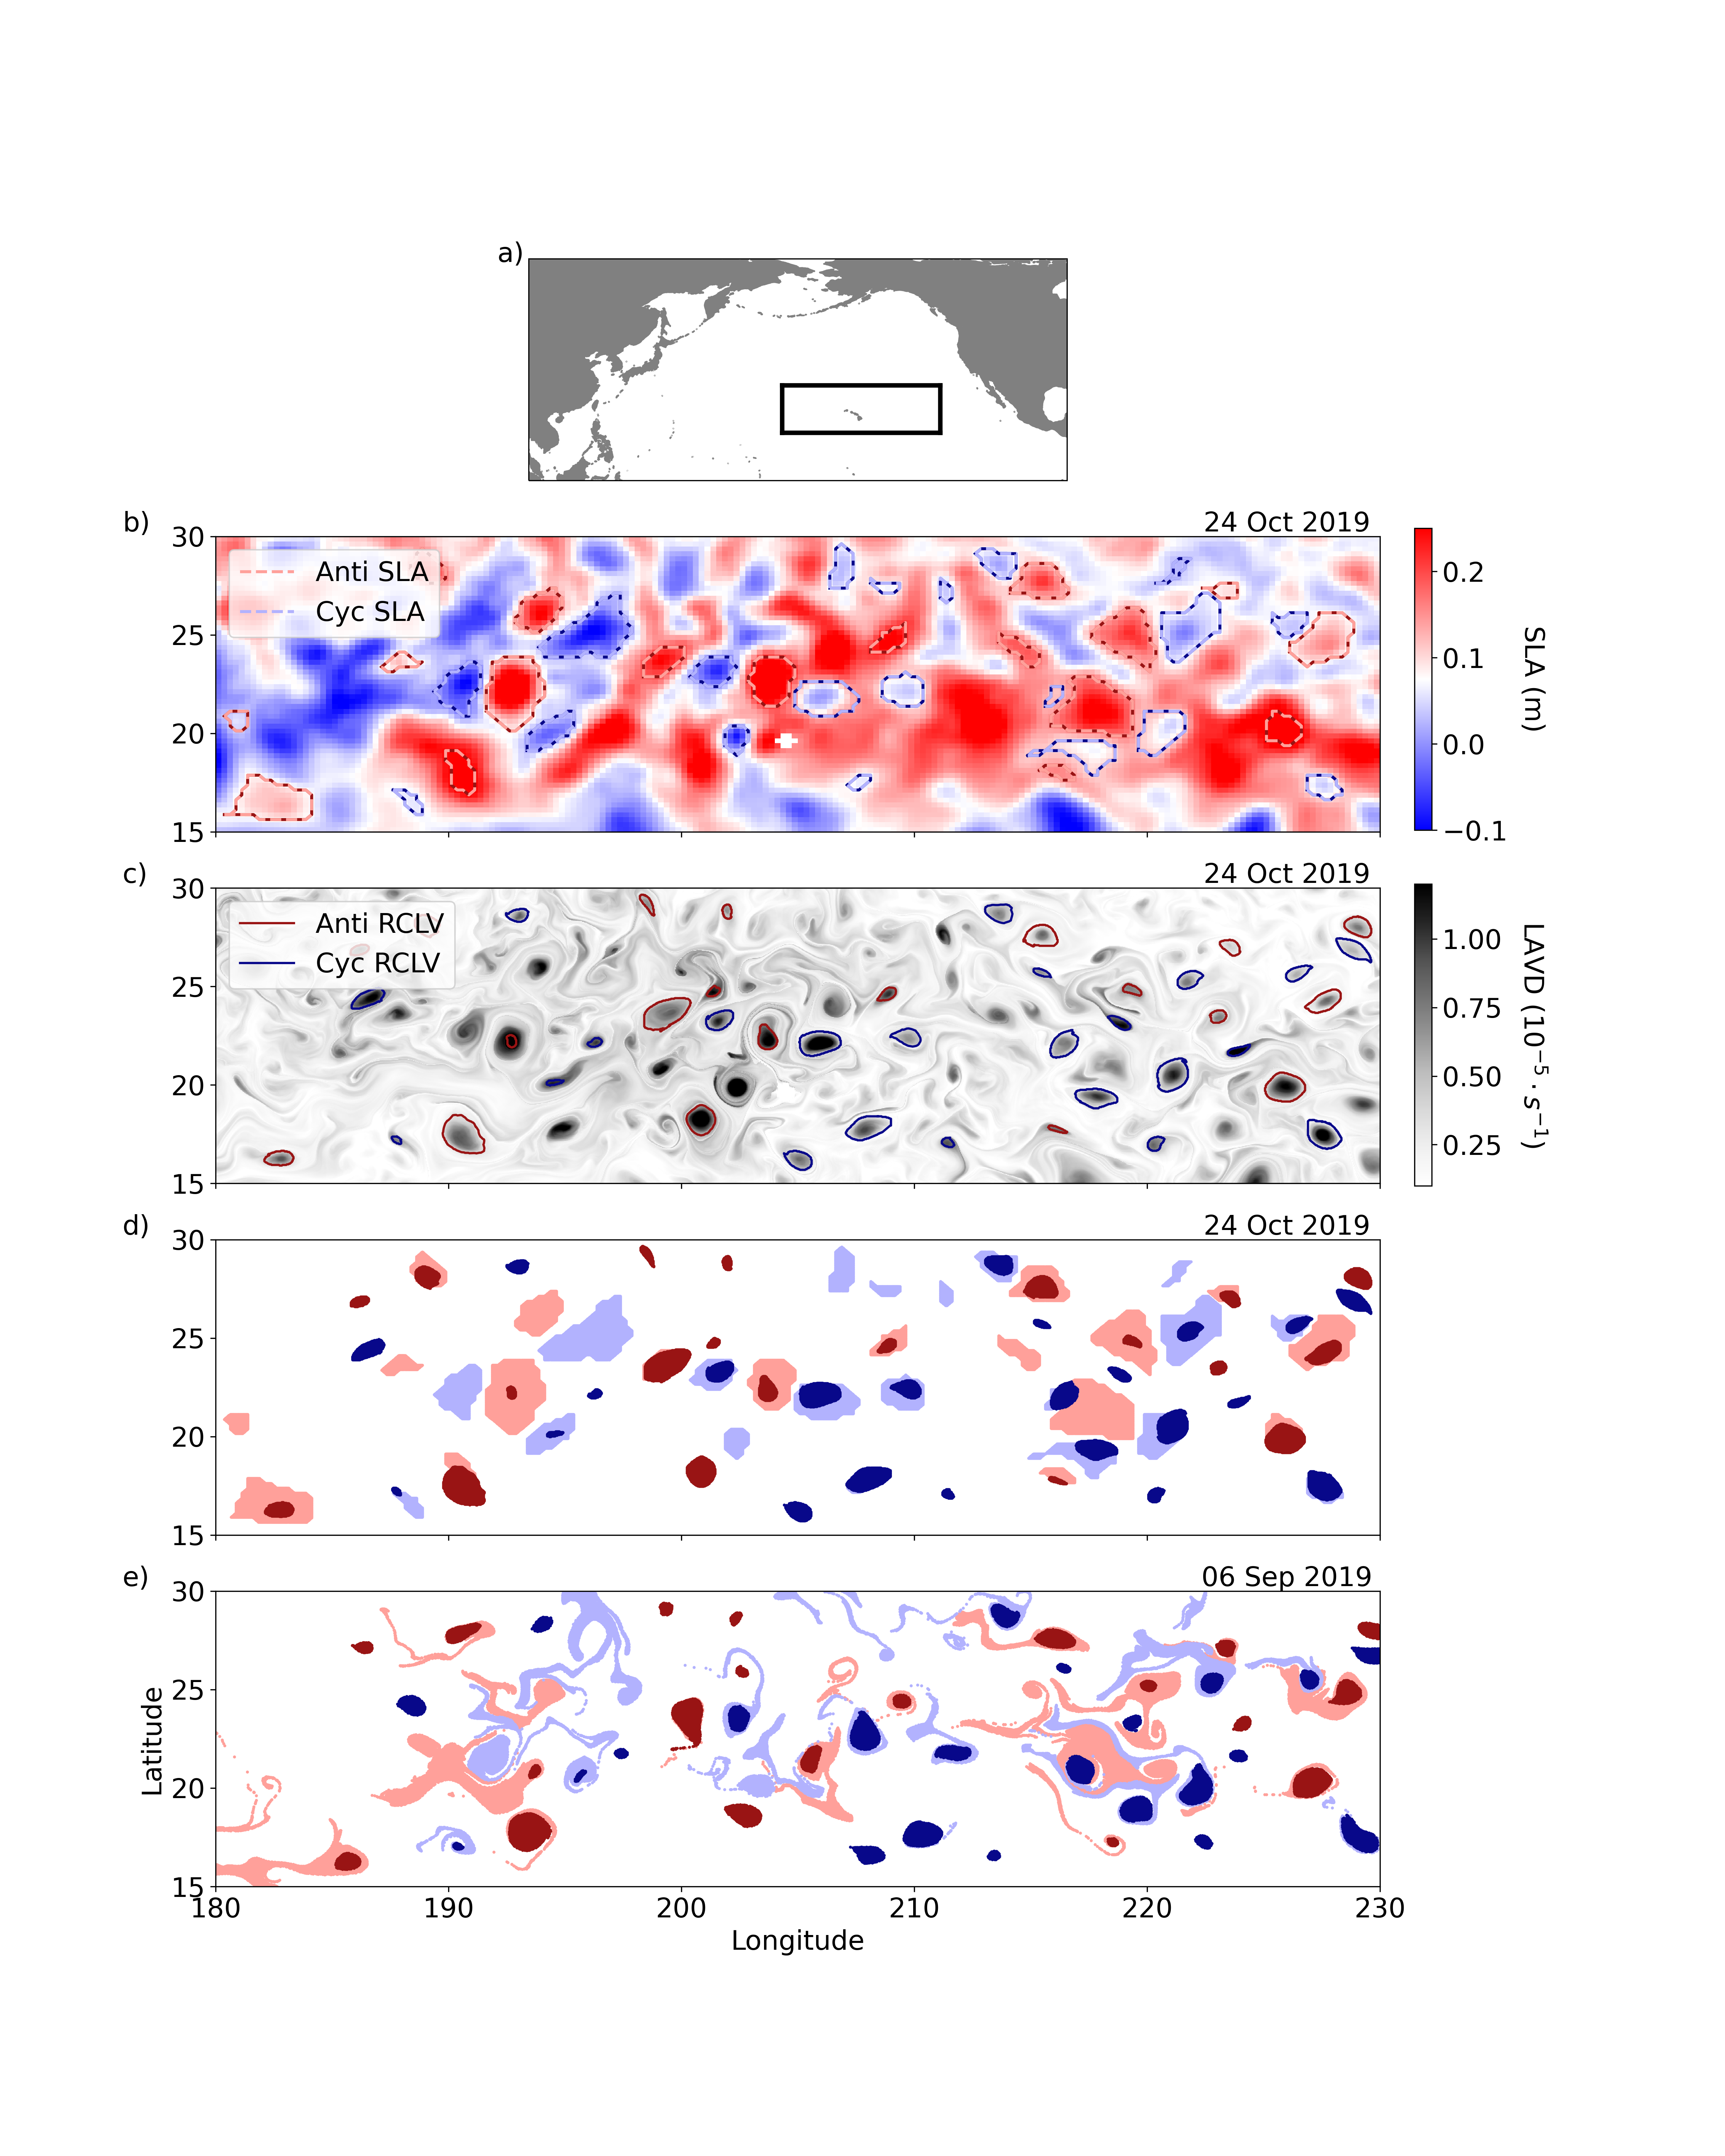

In [30]:
display(Image(filename=save_dir + 'SLA_LAVD_particles_OS.png'))

## PDF Relative Difference Schematic

$\frac{p_E(x) - p_B(x)}{p_B(x)}$

In [31]:
data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'
season = 'WINTER'
province = '1'

bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))

coh_anti_chl = np.load(data_dir + '%s_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
SSH_coh_anti_chl = np.load(data_dir + '%s_SSH_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
RCLV_ANTI_CHL = np.concatenate((coh_anti_chl,SSH_coh_anti_chl)) + 0.01 # artificially spreading the curves

range_min,range_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)

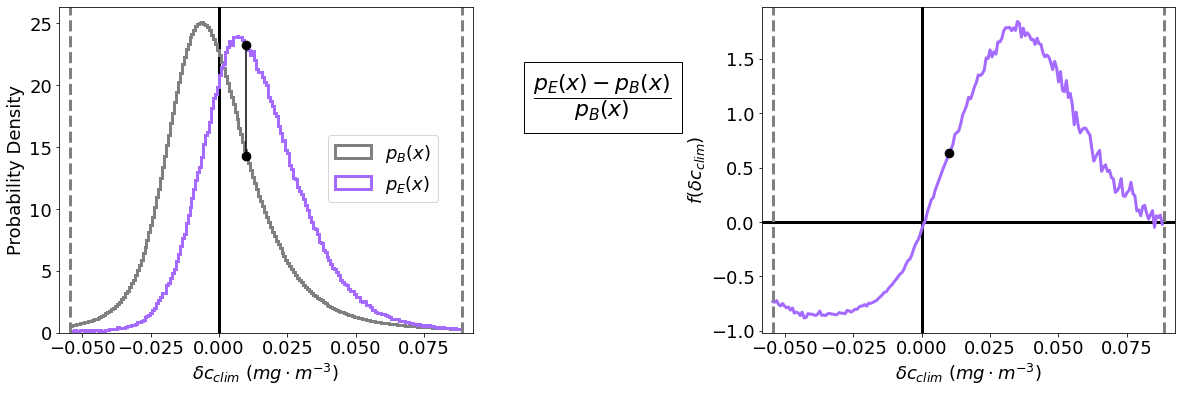

In [32]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.subplots_adjust(wspace=0.7)

fontsize = 18
test_color = '#a56aff'
linewidth = 3
num_bins = 200

######## Plot 0 : Probability Density Distributions ########
bg_test_counts,bg_test_bins,bg_test_bars = ax[0].hist(bg_chl, bins=num_bins, histtype="step", density=True,linewidth=linewidth,color=bg_color,label='$p_B(x)$',range=(range_min,range_max));
e_test_counts,e_test_bins,e_test_bars = ax[0].hist(RCLV_ANTI_CHL, bins=num_bins, histtype="step", density=True,linewidth=linewidth,color=test_color,label='$p_E(x)$',range=(range_min,range_max));
ax[0].set_ylabel('Probability Density',fontsize=fontsize)
ax[0].legend(fontsize=fontsize, loc=(0.65,0.4)) # loc is fraction of plot axes

ind = 90
dot_size = 75
zorder = 10
ax[0].scatter(bg_test_bins[ind],bg_test_counts[ind],c='k',zorder=zorder,s=dot_size)
ax[0].scatter(e_test_bins[ind],e_test_counts[ind],c='k',zorder=zorder,s=dot_size)
ax[0].plot([bg_test_bins[ind],bg_test_bins[ind]],[bg_test_counts[ind],e_test_counts[ind]],c='k',zorder=zorder) #vertical line between lines

######## Schematic / middle stuff ########
ax[0].text(0.115,18.5,'$\dfrac{p_E(x) - p_B(x)}{p_B(x)}$',fontsize=fontsize+4,bbox=dict(facecolor='none', edgecolor='k', pad=10.0))

######## Plot 1 : Relative Difference Plot ########
y_vals = (e_test_counts-bg_test_counts)/bg_test_counts
ax[1].plot(bg_test_bins[:-1],y_vals,c=test_color,linewidth=linewidth)
ax[1].axhline(0,color='k',linewidth=linewidth,zorder=0) #horizontal 0 line
ax[1].set_ylabel('$f(\delta c_{clim}$)',fontsize=fontsize)
ax[1].scatter(bg_test_bins[ind],y_vals[ind],c='k',zorder=zorder,s=dot_size)

######## Both plots ########
for j in [0,1]:
    ax[j].set_xlim([range_min-0.004,range_max+0.004])
    ax[j].tick_params(axis='both',which='major',labelsize=fontsize)
    ax[j].axvline(0,color='k',linewidth=linewidth,zorder=0) #vertical 0 line
    ax[j].axvline(range_min,linewidth=linewidth,linestyle='--',color=bg_color) #1% quantile
    ax[j].axvline(range_max,linewidth=linewidth,linestyle='--',color=bg_color) #99% quantile
    ax[j].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)',fontsize=fontsize)
    
    
save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'density_dist_rel_diff.png', format='png', dpi=350)